In [1]:
from Postprocess_functions import *

Welcome to JupyROOT 6.26/10


In [2]:
import gmsh
import sys
import os
from os.path import exists
import subprocess
import numpy as np
import time
import ROOT
from os import listdir
from os.path import isfile, join
import os.path
from os import path
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import argparse
from ROOT import TFile, TTree
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev,splprep
from scipy.interpolate import BSpline
import math

In [3]:
# Fill the class with the required inputs:
class ArgValues:
    def __init__(self):
        self.folder = "/home/greales/Desktop/TierIIData/2023_02/IncrV"
        self.savefolder = "pictures/ROOT/IncrV/"
args0=ArgValues()
create_folder(args0.savefolder)  # Create required folders to store pictures

pictures/ROOT/IncrV/ already exists.


In [4]:
import re

def extract_number(string):
    match = re.search(r'\d+', string)
    if match:
        return float(match.group())
    else:
        return None

    import os
def extract_numbers_from_folder(path):
    numbers = []
    filenames = os.listdir(path)
    for filename in filenames:
        match = re.search(r'\d+', filename)
        if match:
            numbers.append(float(match.group()))
    return tuple(numbers), filenames


In [5]:
# read values of incrV
incrV, filenames = extract_numbers_from_folder(args0.folder)
ind=1
print(incrV[ind])
print(filenames[ind])

139.0
IncrVIncrV_139,_1292038_28_0.root


In [6]:
def get_branch_values_IncrV(file_path, tree_name, branch_name):
    root_file = TFile(file_path)
    tree = root_file.Get(tree_name)
    branch = tree.GetBranch(branch_name)
    values = []
    for i in range(branch.GetEntries()):
        branch.GetEntry(i)
        values.append(branch.GetLeaf(branch_name).GetValue())
    root_file.Close()
    return values

def GetRootVariables_name(path,tree,branch):
    numbers = []
    filenames = os.listdir(path)
    for filename in filenames:
        val_obj=get_branch_values(path+'/'+filename, tree, branch)
        numbers.append(val_obj[0])
    return numbers

In [7]:
# read values of LC
LC = GetRootVariables_name(args0.folder,"EndOfRun","fLCAvg")
LC[0]

8913.701492537313

In [21]:
import statistics

def get_matching_values_stats(vec1, vec2):
    value_indexes = {} # Dictionary to hold the indexes of matching values in vec1
    for i, value in enumerate(vec1):
        if value not in value_indexes:
            value_indexes[value] = []
        value_indexes[value].append(i) # Add the index to the list of indexes for this value
    avg = [] # List to hold the matching values in vec2
    std = []
    for indexes in value_indexes.values():
        avgval = [vec2[i] for i in indexes]
        average = statistics.mean(avgval)
        std_dev = statistics.stdev(avgval)
        avg.append(average)
        std.append(std_dev)

    incrV_values = [float(x) for x in value_indexes.keys()]
    return incrV_values, avg, std


In [27]:
print(incrV,LC)

(122.0, 139.0, 90.0, 163.0, 86.0, 176.0, 196.0, 37.0, 122.0, 155.0, 33.0, 94.0, 37.0, 114.0, 65.0, 159.0, 163.0, 131.0, 78.0, 127.0, 180.0, 188.0, 49.0, 212.0, 98.0, 196.0, 122.0, 208.0, 41.0, 53.0, 135.0, 29.0, 69.0, 200.0, 151.0, 61.0, 33.0, 200.0, 118.0, 171.0, 167.0, 225.0, 184.0, 216.0, 98.0, 163.0, 184.0, 184.0, 118.0, 90.0, 118.0, 98.0, 25.0, 25.0, 29.0, 73.0, 159.0, 212.0, 200.0, 131.0, 200.0, 33.0, 25.0, 192.0, 147.0, 192.0, 163.0, 98.0, 61.0, 192.0, 98.0, 25.0, 143.0, 61.0, 69.0, 106.0, 82.0, 73.0, 167.0, 65.0, 180.0, 151.0, 151.0, 135.0, 171.0, 114.0, 167.0, 110.0, 45.0, 49.0, 196.0, 159.0, 143.0, 143.0, 98.0, 37.0, 127.0, 180.0, 216.0, 25.0, 114.0, 216.0, 159.0, 86.0, 208.0, 188.0, 29.0, 139.0, 57.0, 188.0, 65.0, 143.0, 73.0, 196.0, 180.0, 90.0, 57.0, 184.0, 106.0, 208.0, 114.0, 155.0, 69.0, 135.0, 131.0, 114.0, 25.0, 159.0, 188.0, 82.0, 171.0, 143.0, 118.0, 131.0, 82.0, 139.0, 49.0, 176.0, 73.0, 200.0, 225.0, 53.0, 131.0, 94.0, 78.0, 114.0, 139.0, 163.0, 45.0, 196.0, 114.0

In [23]:
# Get std, avg and incr
xval, average, std_dev = get_matching_values_stats(incrV,LC)
#print(different_values[0], average[0], std_dev[0])

In [24]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.use('TkAgg')

# Create the plot
fig, ax = plt.subplots()
#ax.errorbar(xval,average, yerr=std_dev, fmt='o',c='gray', capsize=5)
ax.errorbar(xval,average, yerr=std_dev,fmt='o',c='gray', mfc='white', mec='gray', ms=3, mew=2)
# Set the axis labels and titlea
ax.set_xlabel('Design variable [I]')
ax.set_ylabel('Light Collection Average [ph]')
plt.grid()
plt.axvline(x = 100, color = 'k', linestyle = '--')

# Display the plot
fig.savefig("LatexPics/1Dstudy.pdf")
plt.show()
plt.draw()

In [14]:
import csv

# Export data to CSV
data = np.column_stack((xval, average, std_dev))
header = ['xval', 'average', 'std_dev']

with open('data_1D_opt.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(header)
    writer.writerows(data)

In [ ]:
import matplotlib.pyplot as plt

def create_boxplot(locations, data):
    # Create a dictionary to store the data for each location
    data_by_location = {}
    for location, value in zip(locations, data):
        if location not in data_by_location:
            data_by_location[location] = []
        data_by_location[location].append(value)

    # Sort the data by location in increasing order
    sorted_data = sorted(data_by_location.items())

    # Create a list to hold the data for each location
    data_list = [data for _, data in sorted_data]

    # Create the boxplot
    plt.boxplot(data_list)

    # Set the x-axis labels to the sorted locations
    x_ticks = list(range(1, len(sorted_data) + 1))
    x_labels = [str(location) for location, _ in sorted_data]
    plt.xticks(x_ticks, x_labels)

    # Add labels and title
    plt.xlabel("Location")
    plt.ylabel("Data")
    plt.title("Boxplot by Location")

    # Display the plot
    plt.show()

# Example usage
locations = [120, 100, 120, 120, 100, 100, 120, 100]
data = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]


create_boxplot(incrV, LC)



In [8]:
import numpy as np
import matplotlib.pyplot as plt

list1 = np.array(incrV)
list2 = np.array(LC)

# Group list2 values based on unique values in list1
grouped_data = {value: list2[list1 == value] for value in np.unique(list1)}

# Print the grouped data
for key, values in grouped_data.items():
    print(f"Value {key}: {values}")



Value 25.0: [2783.13432836 2841.02985075 2772.94029851 2749.53731343 2783.40298507
 2653.07462687 2753.68656716 2862.6119403  2785.67164179 2864.58208955
 2756.26865672]
Value 29.0: [3054.80597015 2996.62686567 3003.65671642 3133.10447761 3258.70149254
 2934.95522388 3283.85074627 3223.47761194 3156.71641791 3144.52238806
 3232.26865672]
Value 33.0: [3297.23880597 3433.59701493 3300.04477612 3530.70149254 3537.64179104
 3287.71641791 3546.49253731 3388.46268657 3429.64179104 3237.76119403
 3599.43283582]
Value 37.0: [3887.2238806  3844.07462687 3685.25373134 3714.76119403 3761.59701493
 3739.31343284 3711.10447761 3710.73134328 3680.98507463 3972.6119403
 3802.80597015]
Value 41.0: [4273.37313433 4202.37313433 4133.92537313 4012.35820896 4010.85074627
 4079.56716418 4211.         4152.94029851 4159.44776119 4243.52238806
 4273.37313433]
Value 45.0: [4554.13432836 4445.2238806  4438.29850746 4448.8358209  4405.41791045
 4324.13432836 4616.65671642 4295.94029851 4586.64179104 4381.208955

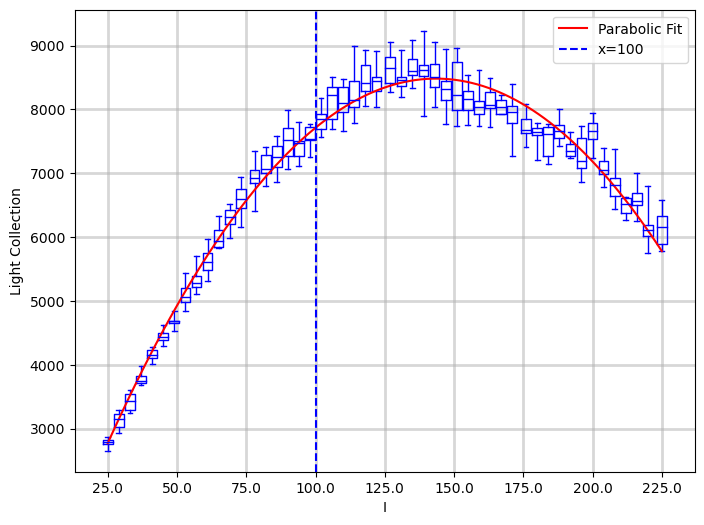

In [25]:

fig, ax = plt.subplots(figsize=(8, 6))

# Create the box plot
boxplot = ax.boxplot(list(grouped_data.values()), positions=list(grouped_data.keys()), widths=3.5, vert=True,
                     patch_artist=False, whiskerprops=dict(color='blue'), capprops=dict(color='blue'),
                     medianprops=dict(color='blue'), flierprops=dict(marker='o', markersize=5, markerfacecolor='black'),
                     whis=10)

# Calculate the mean values for each box
mean_values = [np.mean(values) for values in grouped_data.values()]

# Fit a parabolic curve to the mean values
x = list(grouped_data.keys())
coefs = np.polyfit(x, mean_values, 2)
fit_curve = np.poly1d(coefs)
fit_x = np.linspace(min(x), max(x), 100)
fit_y = fit_curve(fit_x)

# Plot the parabolic fit
ax.plot(fit_x, fit_y, color='red', label='Parabolic Fit')

# Plot a vertical dashed line at x=100
ax.axvline(x=100, linestyle='--', color='blue', label='x=100')

# Set labels and title
ax.set_xlabel('I')
ax.set_ylabel('Light Collection')
ax.set_title('Box Plot with Parabolic Fit')

# Round the x-axis tick labels to the first decimal place
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))

# Add a grid
ax.grid(True, linestyle='-', linewidth=2, alpha=0.5)

# Customize the color of all boxes
for box in boxplot['boxes']:
    box.set_color('blue')

# Remove the title
ax.set_title('')

# Set the number of divisions on the x-axis
num_divisions = 10  # Choose the desired number of divisions
ax.xaxis.set_major_locator(plt.MaxNLocator(num_divisions))

# Save the figure as a PDF
output_filename = '1D_BOX.pdf'
plt.savefig(output_filename, format='pdf')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

locations=incrV
data=LC
# Create a dictionary to store the data for each location
data_by_location = {}
for location, value in zip(locations, data):
        if location not in data_by_location:
            data_by_location[location] = []
        data_by_location[location].append(value)

    # Create a list to hold the data for each location
data_list = []
for location in data_by_location:
        data_list.append(data_by_location[location])


    # Create a list to hold the data for each location
data_list = [data for _, data in sorted_data]

print(data_list)



In [ ]:
import matplotlib.pyplot as plt

list1 = [120, 100, 120, 120, 100, 100, 120, 100, 130, 130, 140, 140]
list2 = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000]

list1=incrV
list2=LC
# Group list2 values based on unique values in list1
grouped_data = {}
for i, value in enumerate(list1):
    if value in grouped_data:
        grouped_data[value].append(list2[i])
    else:
        grouped_data[value] = [list2[i]]

# Create a list of lists containing values for each box
box_data = [grouped_data[value] for value in sorted(set(list1))]

# Create the box plot
plt.boxplot(box_data, positions=sorted(set(list1)), vert=True)

# Set labels and title
plt.xlabel("List1")
plt.ylabel("List2")
plt.title("Box Plot")

# Show the plot
plt.show()
